In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import calendar
%matplotlib inline
import math

In [2]:
df = pd.read_csv('/Users/Dennis/data_science/toydata/bike-sharing-demand/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


稍微查看一下是否有空值？雖然沒有，不過因為資料大多不是乾淨的，筆者曾經做過一項股價的案例，該筆data的target就是券商人為判斷標注的，並不一定準確，所以待會看統計量的時候必須好好檢查！

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


因為上面的數值量大的時候並不好看出來（目前初步觀察覺得濕度、風速兩項指標的最小值很可疑），可視化看看！

/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


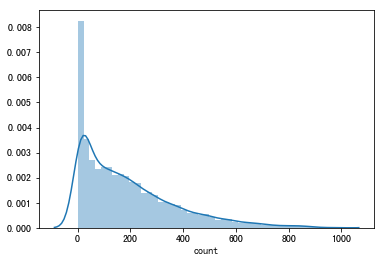

In [9]:
sns.distplot(df['count'])

/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


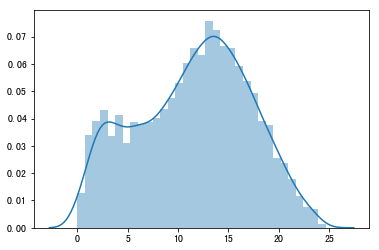

In [29]:
count_boxcox ,_ = sp.stats.boxcox(df['count'])
count_boxcox
sns.distplot(count_boxcox)

次數0的也太多（所以租的人不多XD?），分佈呈現右尾分佈。
另外這邊我們也可以思考data是否可以以「地區」進行分類，而非用時間作為個別資料識別，畢竟次數為0的情況似乎是共享單車地點的分佈不均，我猜測
較多人租用的原因跟地區有很大的相關，延伸到商業應用就可以思考調整共享單車的地點設置。亦或是與地方政府合作推廣單車。
如果要搭建一個線性模型，我們就要考慮對target做boxcox轉換，當然得先繼續EDA以觀察這項預測是否適合使用多元回歸模型等線性模型。

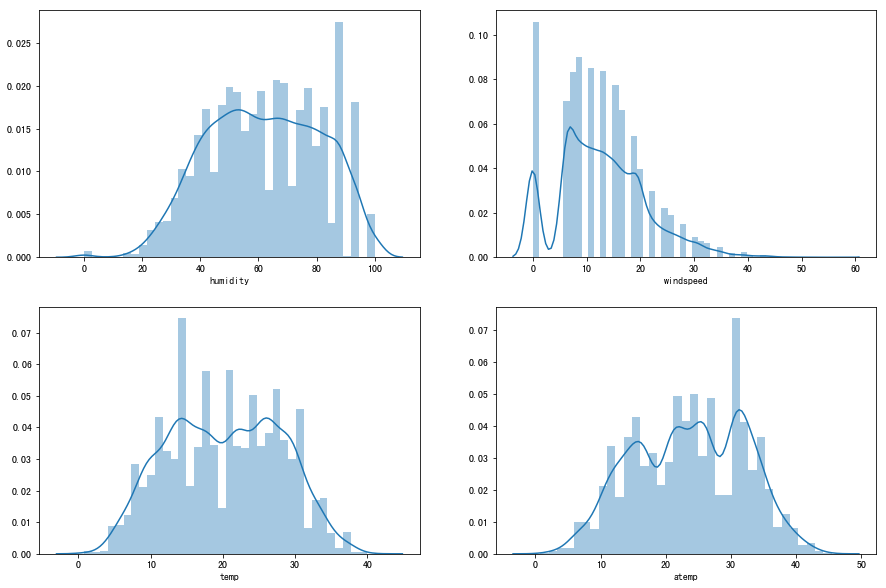

In [18]:
fg , ax = plt.subplots(2,2,figsize =(15,10))
sns.distplot(df.humidity,ax=ax[0][0])
sns.distplot(df.windspeed , ax= ax[0][1])
sns.distplot(df.temp , ax= ax[1][0])
sns.distplot(df.atemp , ax=  ax[1][1])

這裡我們可以發現：風速的分佈很...怪，0的似乎是人工標註上去的，畢竟我們可以以kde還有風速知識看出「真正」的風速應該很像正態分佈
但風速為0的樣本次數有點多，或許是填補缺失值的時候用0代替的！然後有個挺有趣的點，就是體感溫度大於實際溫度。
好，既然假設了風速為0是人工填補的，我們思考有什麼填補的方式：
* 1.使用風速不為0的中位數、平均數、眾數（樣本不多<10時我會考慮使用眾數）
* 2.使用風速不為0的其他特徵來預測風速填補。
* 3.移除風速為0的資料不處理
* 4.使用kmeans來填補風速（其他條件相同的話，可能是相似地理環境，可以推估自然風速應該差不多）
* 5.使用中央氣象局的體感溫度公式，利用體感溫度、氣溫、相對濕度、水氣壓力（我們沒有）反推風速

    因為沒有水氣壓力跟相對濕度，折衷使用這幾項因子預測風速而非直接帶入公式。

In [25]:
df[df.windspeed == 0].count()

datetime      1313
season        1313
holiday       1313
workingday    1313
weather       1313
temp          1313
atemp         1313
humidity      1313
windspeed     1313
casual        1313
registered    1313
count         1313
dtype: int64

好，因為資料並不是非常巨大，但又不能用統計量填補（太多筆了），我們決定採用決策樹迴歸預測。
先繼續EDA，待會做完特徵工程再預測。

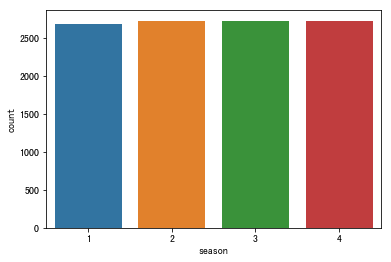

In [46]:
sns.countplot(df.season)

In [50]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['dayOfWeek'] = df.datetime.dt.dayofweek
df['month'] = df.datetime.dt.month
df['hour'] = df.datetime.dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayOfWeek,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,5,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,5,1,4


為了畫時間序列以及觀察季節圖，我們把時間資料轉換一下
* 1.第幾週，可以思考那一週有什麼節日或者活動嗎？發生了什麼事情應對次數的關係
* 2.月份，同上
* 3.小時，調查一天中的使用分佈

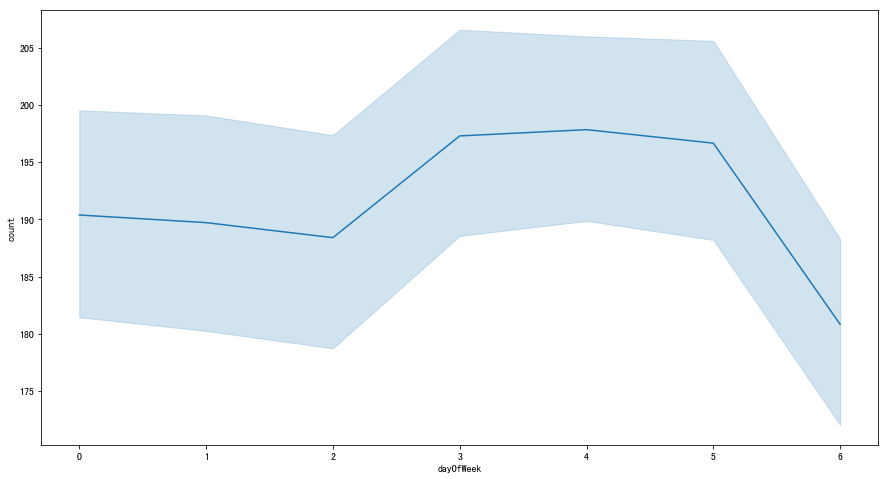

In [71]:
sns.lineplot(x="dayOfWeek", y="count",
             data=df)
fig = plt.gcf()
fig.set_size_inches(15,8)

**禮拜三跟五**最多人騎車，不過禮拜六怎麼會那麼少人呢？不太合理
照理說人們應該習慣假日出去走走，但**禮拜六是需求低點**，**禮拜天也不高呢**，這個地方值得大家好好討論原因。

/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


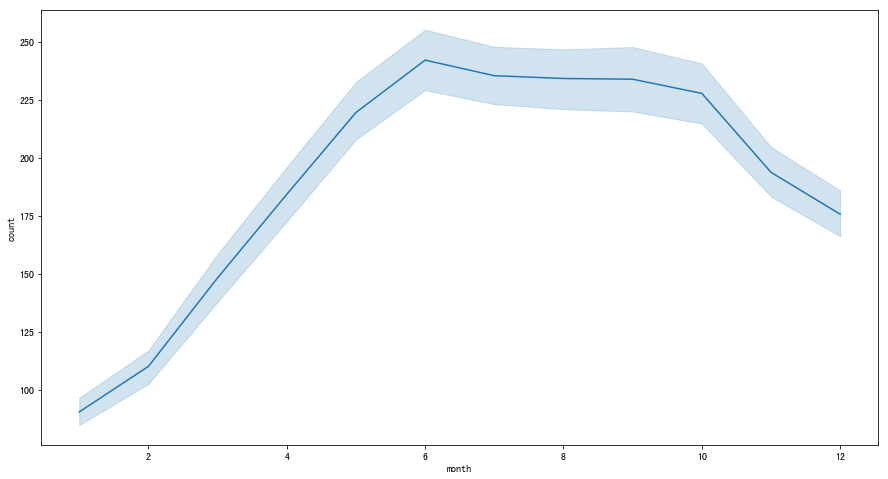

In [81]:
sns.lineplot(x = "month" , y = "count" , data = df)
fig = plt.gcf()
fig.set_size_inches(15,8)

看來6~10月是旺季，尤其以6月最多人使用，至於12~2月就少人用。這是合理的，根據我們對溫度的了解，大家普遍偏好天氣好時出門騎車。
而6~10月是北半球的夏天，故此段時間人最多，另外2月之後使用的人開始大幅增長，到了5月又開始漸漸緩步上升。

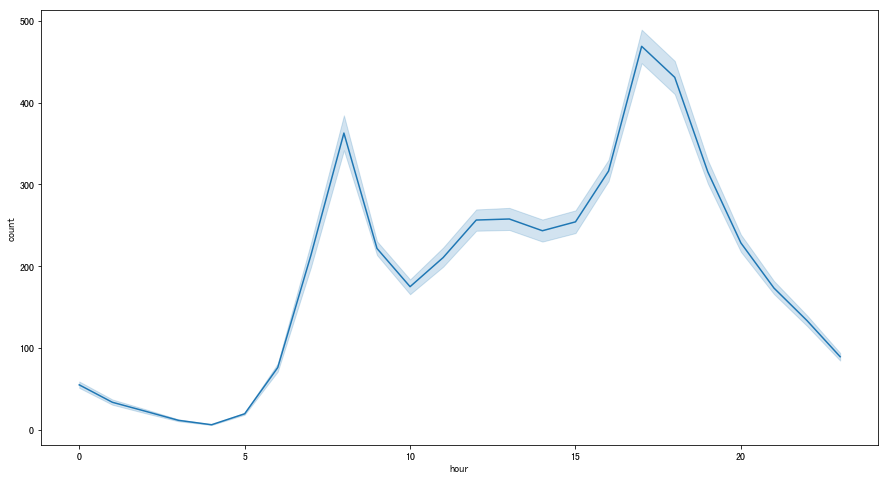

In [84]:
sns.lineplot(x="hour", y="count",
             data=df)
fig = plt.gcf()
fig.set_size_inches(15,8)

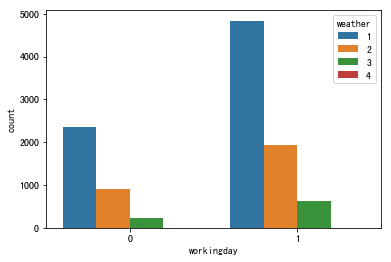

In [147]:
sns.countplot(x="workingday"   , data = df ,hue = "weather")

也許這是為什麼假日比較少人騎車的原因，我們可以看見峰值出現在早上的7~9點以及下午5~6點，換句話說，人們使用共享單車其實是_「當作上下班的交通工具」_，這裡我們可以看出共享單車的TA應該是一群上班族，12點的轉折處也可以表示有些人會騎車出去吃午餐。從次數圖我們也可以看出天氣好人們騎車的意願越高，而且比起陰天到飄雨，白天到陰天的差距更大，說明只要天氣稍微變差人們就會放棄騎車。

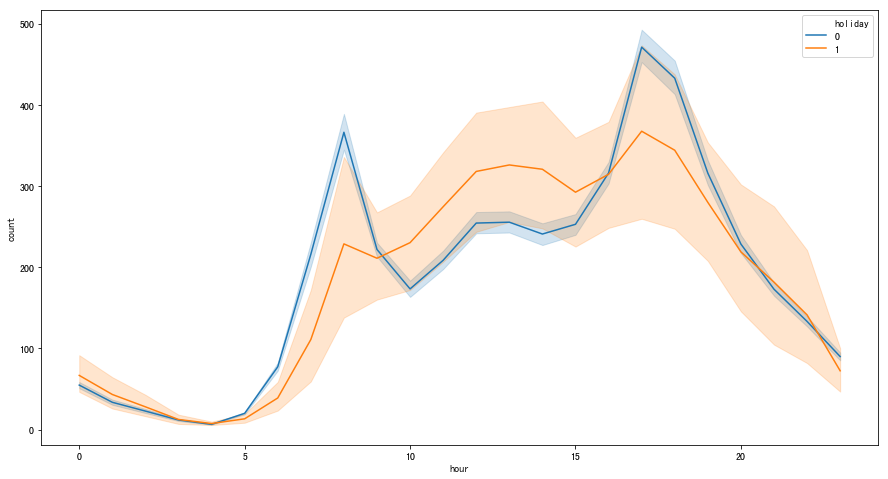

In [86]:
sns.lineplot(x="hour", y="count",
             hue = "holiday",
             data=df)
fig = plt.gcf()
fig.set_size_inches(15,8)

我們觀察「節日」跟小時的關係，發現一個很明顯的點：**早上9點～下午3點** 共享單車的使用次數有反轉，亦即只有這段時間內節日的租用次數會大於非節日，既然我們已經從資料描述得知workingday不是假日也不是節日，代表假日人們使用單車主要是早晨與下午出遊，傍晚則是使用高峰。
這裡顯示出單車在假日可以當作出遊的工具，那麼我們可以進入節日市場，推出單車一日遊活動等等...增加使用者使用的時間以及促銷。

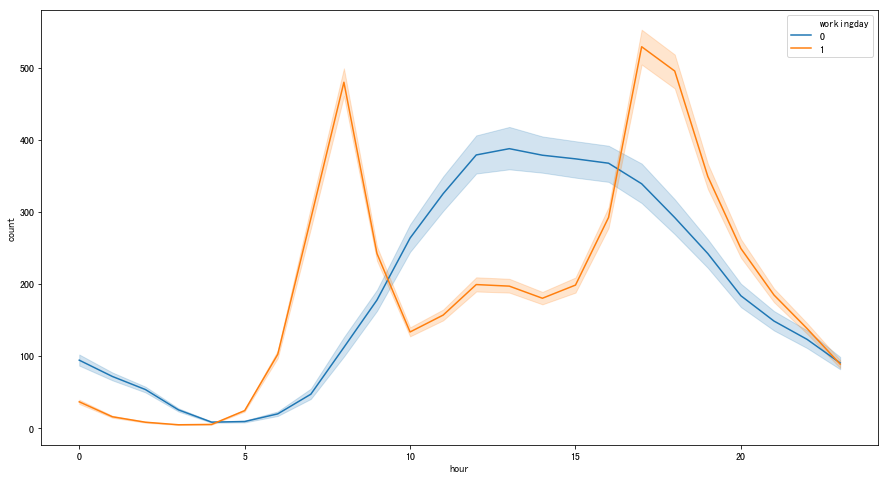

In [91]:
sns.lineplot(x="hour", y="count",
             hue = "workingday",
             data=df)
fig = plt.gcf()
fig.set_size_inches(15,8)

Text(0.5, 0.98, '季節與租用次數關係')

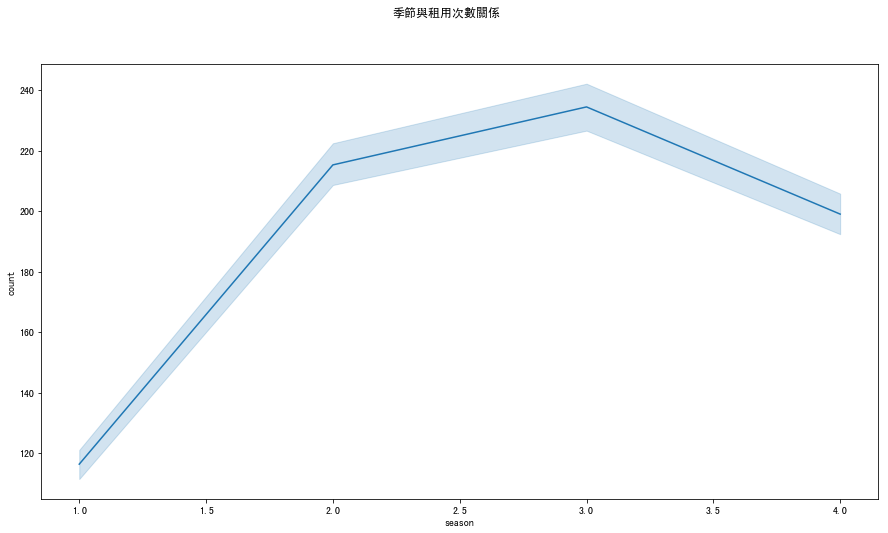

In [99]:
sns.lineplot(x="season", y="count",
#              hue = "workingday",
             data=df)
fig = plt.gcf()
fig.set_size_inches(15,8)
fig.suptitle('季節與租用次數關係')

In [100]:
df.groupby('season')['count'].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

季節因素也佔了蠻大的原因，秋天涼爽宜人果然最適合騎車

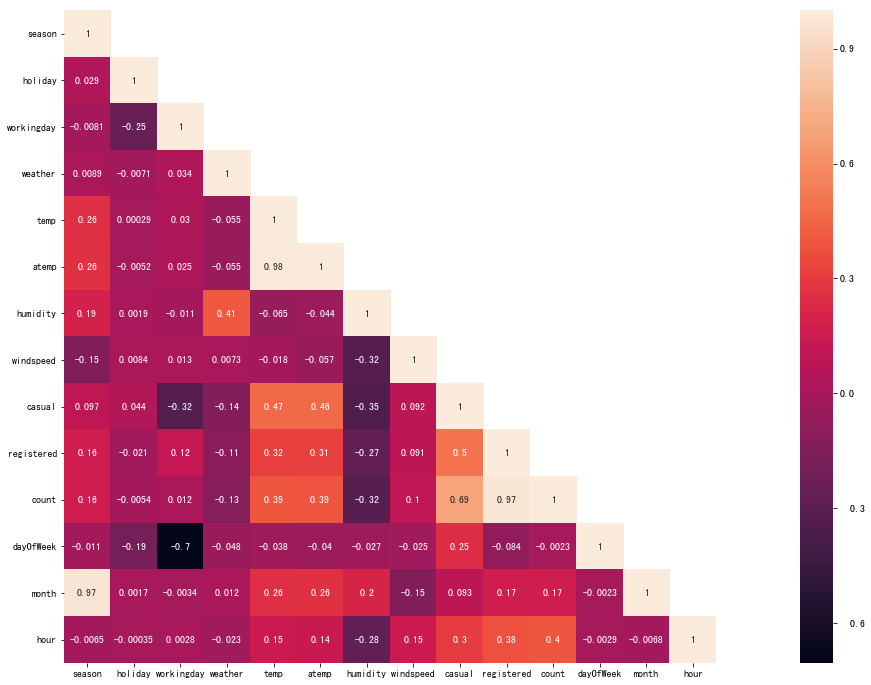

In [51]:
cor_mat = df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

看來濕度太高會讓人不想騎車，另外溫度跟次數呈正相關，我們可以推估或許是因為天氣好大家比較想出來走走，就會使用這項服務。
為了更好觀察這些係數，我們可視化話感興趣的值。又因為數值實在太細（到小數點第三位）我們把他們統一換成整數比較好觀察。

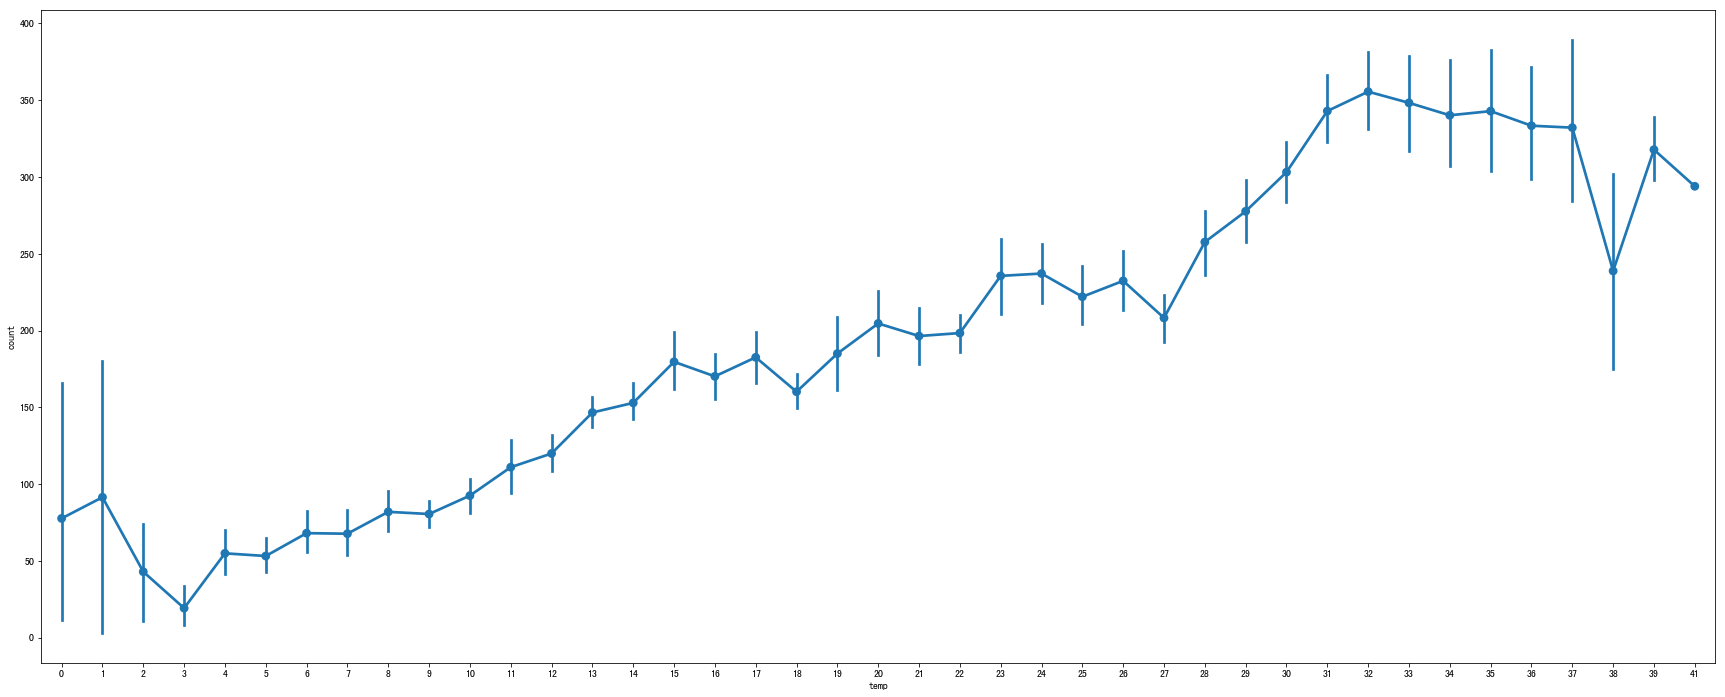

In [62]:
sns.pointplot(df.temp.apply(lambda x:math.floor(x)) , df['count'])
fig = plt.gcf()
fig.set_size_inches(30,12)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


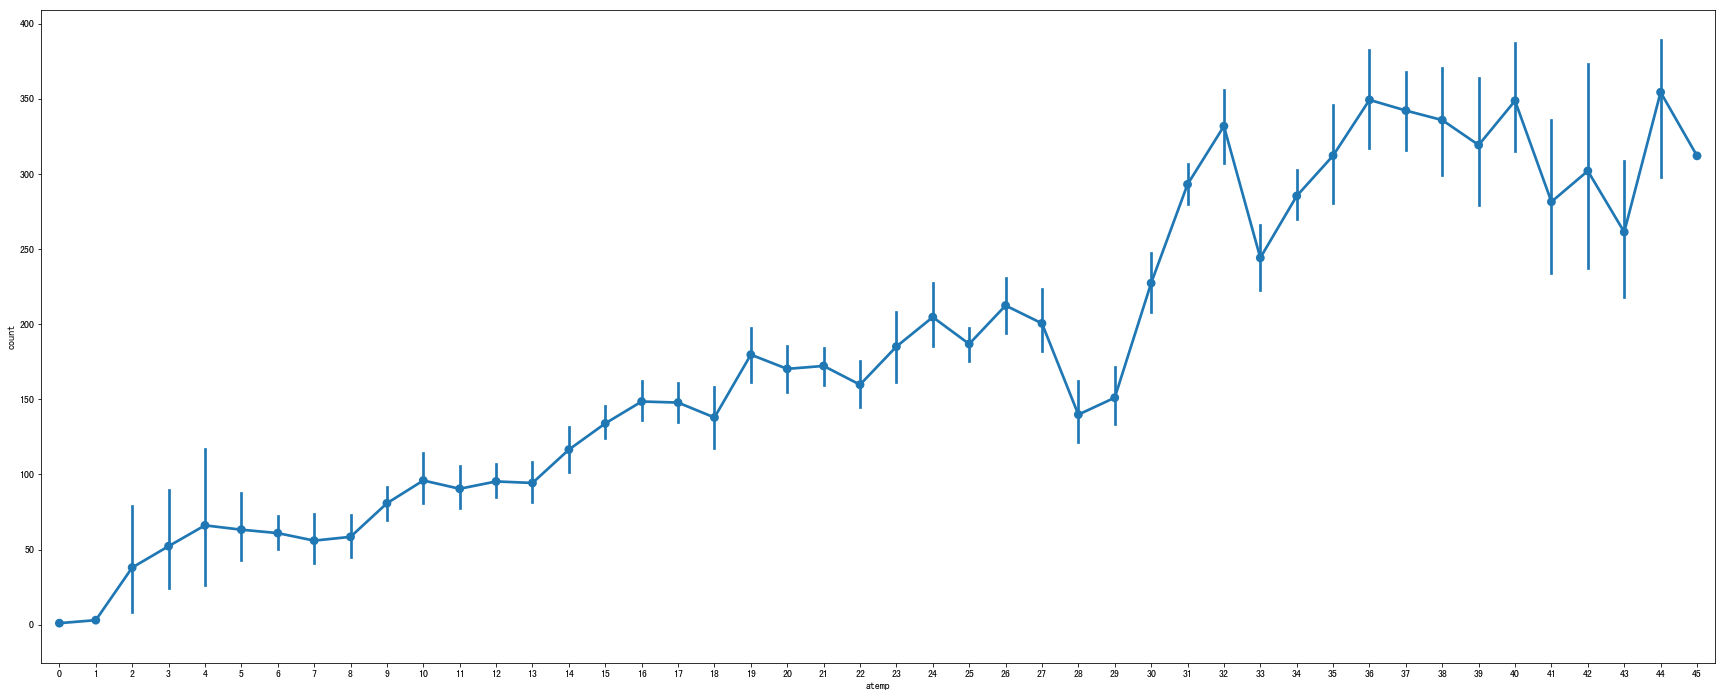

In [61]:
sns.pointplot(df.atemp.apply(lambda x:math.floor(x)) , df['count'])
fig = plt.gcf()
fig.set_size_inches(30,12)

這裡我們實際上會比較關心「實際溫度」，畢竟體感溫度是經過許多假設換算出來的，不能夠客觀地衡量因應溫度制訂的商業策略。
我們可以看出30~37度之間是最適合騎車的，不過到38度就會突然大幅下降，為什麼呢？
以我國來說，38度剛好是高溫資訊：紅燈的指標（持續三天以上），僅僅38度則是黃燈與橙燈的分界
雖然這是國外的資料，但是這樣的現象確實挺有趣的。

## 特徵工程

In [158]:
df= pd.read_csv('/Users/Dennis/data_science/toydata/bike-sharing-demand/train.csv')
df_test = pd.read_csv('/Users/Dennis/data_science/toydata/bike-sharing-demand/test.csv')
data = df_train.append(df_test)
#data.reset_index(inplace = True , drop = True)
df = data
data.head()

/Users/Dennis/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


來根據我們上面所做的EDA新增週日、小時、月份

In [159]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['dayOfWeek'] = df.datetime.dt.dayofweek
df['month'] = df.datetime.dt.month
df['hour'] = df.datetime.dt.hour
df.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,dayOfWeek,month,hour
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,5,1,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,5,1,1
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,5,1,2
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,5,1,3
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,5,1,4


In [160]:
data  = df
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 15 columns):
atemp         17379 non-null float64
casual        10886 non-null float64
count         10886 non-null float64
datetime      17379 non-null datetime64[ns]
holiday       17379 non-null int64
humidity      17379 non-null int64
registered    10886 non-null float64
season        17379 non-null int64
temp          17379 non-null float64
weather       17379 non-null int64
windspeed     17379 non-null float64
workingday    17379 non-null int64
dayOfWeek     17379 non-null int64
month         17379 non-null int64
hour          17379 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(8)
memory usage: 2.1 MB


使用隨機森林預測風速

In [161]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

/Users/Dennis/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [162]:
rfModel_wind.score(dataWindNot0[windColumns], dataWindNot0["windspeed"])

0.7123003531773499

In [163]:
wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


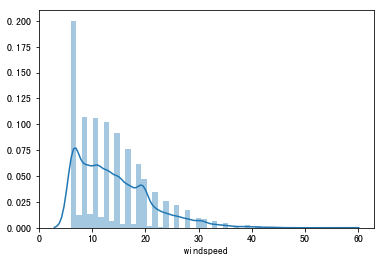

In [164]:
sns.distplot(data.windspeed)

重新預估填補了0值，這樣的結果看起來合理得多

In [177]:
dropFeatures = ['casual' , 'registered' , 'count' ,'datetime']
dataTrain = data[pd.notnull(data['count'])].sort_values(by = ['datetime'])
dataTest = data[~pd.notnull(data['count'])].sort_values(by = 'datetime')
datetimecol = dataTest['datetime']
yLabels = dataTrain['count']
dataTrain = dataTrain.drop(dropFeatures , axis = 1)
dataTest = dataTest.drop(dropFeatures , axis =1)
yLabelsBox , _ = sp.stats.boxcox(yLabels)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


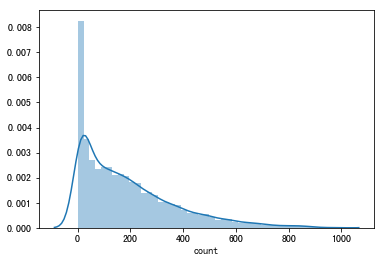

In [178]:
sns.distplot(yLabels)

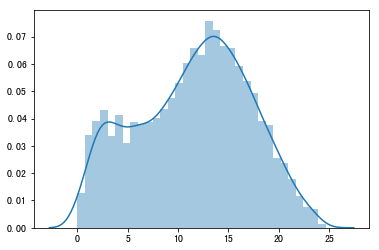

In [179]:
sns.distplot(yLabelsBox)

經過測試，我們發現取log的表現會比較好，ylabel改取log

In [185]:
model  = RandomForestRegressor(n_estimators=50 , random_state=42)
yLabelsLog = np.log(yLabels)
model.fit(dataTrain , yLabelsLog)
model.score(dataTrain , yLabelsLog)

0.9892410290197744

In [196]:
y_pred = model.predict(dataTest)
submission  = pd.DataFrame({"datetime":datetimecol , "count":[max(0,x) for x in np.exp(y_pred)]})
submission.to_csv('Bike_prediction_by_random_forest.csv' , index = False)